In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telecom-churn/telecom_churn.csv


# ****เปลี่ยนค่ายมือถือ****

In [2]:
df = pd.read_csv('../input/telecom-churn/telecom_churn.csv')

In [3]:
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [4]:
df.isnull().any()

Churn              False
AccountWeeks       False
ContractRenewal    False
DataPlan           False
DataUsage          False
CustServCalls      False
DayMins            False
DayCalls           False
MonthlyCharge      False
OverageFee         False
RoamMins           False
dtype: bool

In [5]:
df.dtypes

Churn                int64
AccountWeeks         int64
ContractRenewal      int64
DataPlan             int64
DataUsage          float64
CustServCalls        int64
DayMins            float64
DayCalls             int64
MonthlyCharge      float64
OverageFee         float64
RoamMins           float64
dtype: object

In [6]:
 df.describe() # std เป็น 0 คือค่าซ้ำจะไม่นำมาคิด

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [7]:
X = df.drop(['Churn'],1)
y = df['Churn']

In [8]:
X

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...
3328,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [9]:
np.unique(y)

array([0, 1])

In [10]:
np.sum(y)

483

In [11]:
np.sum(1-y)

2850

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
X_train.shape

(2666, 10)

In [14]:
X_test.shape

(667, 10)

In [15]:
np.sum(y_train)

395

In [16]:
np.sum(1-y_train)

2271

In [17]:
np.sum(y_test)

88

In [18]:
np.sum(1-y_test)

579

In [19]:
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
#preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#model
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier

sm = SMOTE(random_state=0)
X_res, y_res = sm.fit_resample(X_train, y_train)

clf = Pipeline([
    ('feature_selection',SelectKBest(f_classif,k=10)),
    #('feature_reduction',PCA(n_components = 10)),
    ('scaler', MinMaxScaler(feature_range=(0, 1))), 
    #('standardScaler',StandardScaler()),
    #('KN_Clf',KNeighborsClassifier()),
    ('ETC_Clf',ExtraTreesClassifier(random_state=0))
])

In [20]:
import time
from time import sleep
from tqdm.notebook import tqdm
from sklearn.metrics import mean_squared_error,r2_score

t0 = time.time()
pr = {
    'ETC_Clf__n_estimators' : [10,50,100,200,300,500],
    'ETC_Clf__min_samples_leaf' : [1,2,4,8,16,32,64],
    'ETC_Clf__max_features' : ['sqrt',0.1,0.2,0.3,0.4,0.9,1,2,4,9],
}

for i in tqdm(pr):
    best_clf = RandomizedSearchCV(clf,pr,cv=10,scoring='accuracy',n_iter=6,random_state=0) # n_iter 6-100 same result
    best_clf.fit(X_res,y_res)
print ("Training time: " + str(round(time.time()-t0,2)) + " s")

  0%|          | 0/3 [00:00<?, ?it/s]

Training time: 112.19 s


In [21]:
yp = best_clf.predict(X_test)
acc_test = sum(yp == y_test)/len(y_test)
print("Best score is " + str(best_clf.best_score_*100) +('\n') +"Best param is " + str(best_clf.best_params_))
print("Test Training Acc. : " + str(acc_test*100))

Best score is 94.01195720578981
Best param is {'ETC_Clf__n_estimators': 500, 'ETC_Clf__min_samples_leaf': 1, 'ETC_Clf__max_features': 4}
Test Training Acc. : 89.65517241379311


* Best score is 94.01195720578981
* Best param is {'ETC_Clf__n_estimators': 500, 'ETC_Clf__min_samples_leaf': 1, 'ETC_Clf__max_features': 4}
* Test Training Acc. : 89.65517241379311

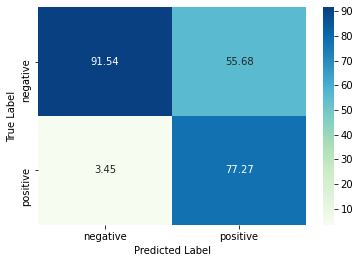

In [22]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,yp) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C,annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [23]:
from time import sleep
from tqdm.notebook import tqdm
import time, datetime

start = datetime.datetime.now()
for i in tqdm(range(100)):
    time.sleep(0.01)
    
end = datetime.datetime.now()
diff = (end - start)
datetime.timedelta(seconds=10, microseconds=885206)

  0%|          | 0/100 [00:00<?, ?it/s]

datetime.timedelta(seconds=10, microseconds=885206)